# Statistical Programming Python

## Dimensionality Reduction - Principal Component Analysis (PCA)


<img src="profile_manoelgadi.png" width=100 height=100 align="right">

Author: Prof. Manoel Gadi

Contact: mfalonso@faculty.ie.edu

Teaching Web: http://mfalonso.pythonanywhere.com

Last revision: 14/October/2019

---

---

PCA is the data reduction technique (columns).
* This method seeks to find linear combinations of predictors, known as main components (PC), that capture the greatest possible variance.
* The __1o main component of the PC captures the greatest variability among all linear combinations
* Then, __the subsequent PCs__ are derived in such a way that these linear combinations capture the most remaining variability and, at the same time, do not correlate with all previous PCs.


Advantages:
* Create components that are not correlated.
* The PCA does not consider the response variable when summarizing the variability. Not supervised

Warnings:
* Sensitive to scales and distributions (biased).
* PCA focuses on identifying the data structure based on measurement scales rather than the important relationships within the data.


## PCA for data visualization

Reference: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 and https://www.youtube.com/watch?v=kApPBm1YsqU

For many machine learning applications, it is useful to be able to visualize your data. Visualizing data in 2 or 3 dimensions is not that challenging. However, even the Iris data set used in this part of the tutorial is 4 dimensions. One can use PCA to reduce that three-dimensional data to 2 or 3 dimensions so that it can plot and, hopefully, better understand the data.

### Loading the Iris dataset

The Iris data set is one of the data sets that scikit-learn comes with that does not require downloading any files from any external website. The following code will load the iris data set.

### Importing the database: RBA_KYC_Accounts.xlsx

In [1]:
import pandas as pd
df = pd.read_excel('RBA_KYC_Accounts_ALL_Ids.xlsx')

## Checking some quick statistics

In [2]:
df.describe()

,org_code,branchCode,customerId,customerType,residentStatus,age_in_year,birthCountry,profession,companyType,lastUpdate,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card_Desc,rbaValue
count,224868.0,224868.000000,2.248680e+05,224868.000000,224868.000000,220153.000000,0.0,79748.000000,114574.000000,0.0,...,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,0.0,224868.000000
mean,1.0,448.451323,4.394503e+16,1.114418,1.021221,41.310575,NaN,18.309487,49.857577,NaN,...,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,17.624194
std,0.0,228.193308,2.349321e+16,0.318319,0.144122,16.000536,NaN,6.586481,6.736115,NaN,...,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,8.368345
min,1.0,201.000000,2.020028e+09,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,...,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,4.080000
25%,1.0,208.000000,2.070207e+16,1.000000,1.000000,31.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,13.330000
50%,1.0,401.000000,4.011205e+16,1.000000,1.000000,41.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,16.530000
75%,1.0,701.000000,7.012410e+16,1.000000,1.000000,52.000000,NaN,21.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,21.330000
max,1.0,805.000000,8.052929e+16,2.000000,2.000000,119.000000,NaN,39.000000,100.000000,NaN,...,1267.000000,0.000000e+00,3292.000000,5.867291e+05,78.000000,8.394000e+06,2858.000000,9.942530e+06,NaN,100.000000


## Checking for percentage (%) of missing values

In [3]:
100*df.isnull().sum()/df.isnull().count()

org_code                        0.000000
branchCode                      0.000000
customerId                      0.000000
fullaccount                     0.000000
customerType                    0.000000
creationDate                    0.000000
onboarding                      0.000000
residentStatus                  0.000000
residentCountry                 0.265044
nationalityOriginal             1.529342
extraNationality               99.202643
dateOfBirth                     2.096786
age_in_year                     2.096786
birthCountry                  100.000000
birthPlace                      9.713254
profession                     64.535639
companyType                    49.048331
giinCode                       99.994664
lastUpdate                    100.000000
status                          0.000000
ledgerCode                      0.000000
accountCurrency                 0.000000
jointAccount                    0.000000
IsBlackListed                   0.000000
CUS_CLASS       

## Making some histograms

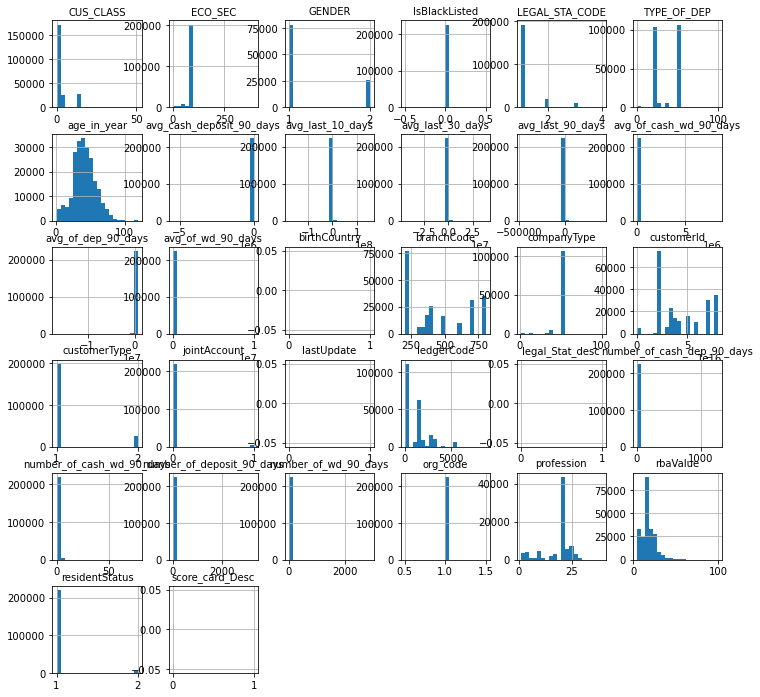

In [4]:

import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

## Droping variables with no information at all

In [5]:
df.drop(['birthCountry', 
         'lastUpdate', 
         'legal_Stat_desc', 
         'IsBlackListed',
         'customerId',
         'birthPlace'], axis = 1, inplace = True) 

In [6]:
df.dtypes

org_code                        int64
branchCode                      int64
fullaccount                    object
customerType                    int64
creationDate                   object
onboarding                     object
residentStatus                  int64
residentCountry                object
nationalityOriginal            object
extraNationality               object
dateOfBirth                    object
age_in_year                   float64
profession                    float64
companyType                   float64
giinCode                       object
status                         object
ledgerCode                      int64
accountCurrency                object
jointAccount                    int64
CUS_CLASS                       int64
ECO_SEC                         int64
TYPE_OF_DEP                     int64
GENDER                        float64
LEGAL_STA_CODE                float64
avg_last_10_days              float64
avg_last_30_days              float64
avg_last_90_

In [7]:
df.select_dtypes(include=['object']).dtypes

fullaccount            object
creationDate           object
onboarding             object
residentCountry        object
nationalityOriginal    object
extraNationality       object
dateOfBirth            object
giinCode               object
status                 object
accountCurrency        object
date_of_assessment     object
rbaGradeAbrv           object
rba_grade_desc         object
score_card             object
dtype: object

### Treatment for variables that are NOT numeric
*     Label Encoder. Label Encoding in Python can be achieved using Sklearn Library.
*     Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values.
*     LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels.
*     If a label repeats it assigns the same value to as assigned earlier.

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['creationDate']= label_encoder.fit_transform(df['creationDate'])

In [9]:
df['onboarding']= label_encoder.fit_transform(df['onboarding'])

In [10]:
df['residentCountry']= label_encoder.fit_transform(df['residentCountry'].astype(str))

In [11]:
df['nationalityOriginal']= label_encoder.fit_transform(df['nationalityOriginal'].astype(str))

In [12]:
df['extraNationality']= label_encoder.fit_transform(df['extraNationality'].astype(str))

In [13]:
df['dateOfBirth']= label_encoder.fit_transform(df['dateOfBirth'].astype(str))

In [14]:
df['giinCode']= label_encoder.fit_transform(df['giinCode'].astype(str))

In [15]:
df['status']= label_encoder.fit_transform(df['status'])

In [16]:
df['accountCurrency']= label_encoder.fit_transform(df['accountCurrency'].astype(str))

In [17]:
df['date_of_assessment']= label_encoder.fit_transform(df['date_of_assessment'])

In [18]:
df.shape

(224868, 41)

### Creating variables NEGATIVE information
meaning 1 when original variable is missing and zero otherwise

In [19]:
for var in df.columns[:-5]:
    if sum(1*df[var].isnull()):
        print(var, 'has missings')
        df.loc[df[var].isnull(),var] = 0
        df[var+'_missing']=1*df[var].isnull()

age_in_year has missings
profession has missings
companyType has missings
GENDER has missings
LEGAL_STA_CODE has missings


### Now what we can do for those NUMERIC variables make a standardization
First we remove NaN

In [20]:
df_PCA = df.fillna(0)

In [21]:
df_PCA.isnull().sum()

org_code                      0
branchCode                    0
fullaccount                   0
customerType                  0
creationDate                  0
onboarding                    0
residentStatus                0
residentCountry               0
nationalityOriginal           0
extraNationality              0
dateOfBirth                   0
age_in_year                   0
profession                    0
companyType                   0
giinCode                      0
status                        0
ledgerCode                    0
accountCurrency               0
jointAccount                  0
CUS_CLASS                     0
ECO_SEC                       0
TYPE_OF_DEP                   0
GENDER                        0
LEGAL_STA_CODE                0
avg_last_10_days              0
avg_last_30_days              0
avg_last_90_days              0
number_of_cash_dep_90_days    0
avg_cash_deposit_90_days      0
number_of_deposit_90_days     0
avg_of_dep_90_days            0
number_o

### We make a standardization to Normal Distribuition


In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np

num_cols = df_PCA.columns[df_PCA.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = StandardScaler()
df_PCA[num_cols] = scaler.fit_transform(df_PCA[num_cols]) 

In [23]:
df_PCA.dtypes


org_code                      float64
branchCode                    float64
fullaccount                    object
customerType                  float64
creationDate                  float64
onboarding                    float64
residentStatus                float64
residentCountry               float64
nationalityOriginal           float64
extraNationality              float64
dateOfBirth                   float64
age_in_year                   float64
profession                    float64
companyType                   float64
giinCode                      float64
status                        float64
ledgerCode                    float64
accountCurrency               float64
jointAccount                  float64
CUS_CLASS                     float64
ECO_SEC                       float64
TYPE_OF_DEP                   float64
GENDER                        float64
LEGAL_STA_CODE                float64
avg_last_10_days              float64
avg_last_30_days              float64
avg_last_90_

### I remove the last 4 variables of my data frame that are not going to be used in the PCA


In [24]:
df_PCA.drop(['rbaValue',
             'rba_grade_desc',
             'score_card_Desc',
             'score_card',
         'rbaGradeAbrv',
         'date_of_assessment'], axis = 1, inplace = True) 

In [25]:
df_PCA.head()

,org_code,branchCode,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,...,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,age_in_year_missing,profession_missing,companyType_missing,GENDER_missing,LEGAL_STA_CODE_missing
0,0.0,-1.084396,020100400550015817000,2.782061,0.481644,-0.151984,-0.147246,-0.076303,-0.130002,0.052109,...,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,0.0,0.0,0.0,0.0,0.0
1,0.0,-1.080014,020200207860011330000,-0.359446,0.224874,-0.151984,-0.147246,-0.076303,-0.130002,0.052109,...,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,0.0,0.0,0.0,0.0,0.0
2,0.0,-1.080014,020200207860011389002,-0.359446,0.224874,-0.151984,-0.147246,-0.076303,-0.130002,0.052109,...,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,0.0,0.0,0.0,0.0,0.0
3,0.0,-1.080014,020200207860010060000,-0.359446,0.224874,-0.151984,-0.147246,-0.076303,-0.130002,0.052109,...,0.032676,0.634319,-0.021024,0.010626,-0.041255,0.0,0.0,0.0,0.0,0.0
4,0.0,-1.080014,020200207860010010000,-0.359446,0.224874,-0.151984,-0.147246,-0.076303,-0.130002,0.052109,...,0.032785,0.634319,-0.020728,0.010626,-0.041152,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_PCA)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [27]:
principalDf.head()

,principal component 1,principal component 2
0,-2.465859e+19,3.004583
1,-2.455878e+19,-1.053305
2,-2.455878e+19,-1.037377
3,-2.455878e+19,-0.933699
4,-2.455878e+19,-0.936207


### Here our target variable is Risk_Description, so attach it to my base data of PCAs

In [28]:
finalDf = pd.concat([principalDf, df[['rba_grade_desc']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,rba_grade_desc
0,-2.465859e+19,3.004583,Low
1,-2.455878e+19,-1.053305,Low
2,-2.455878e+19,-1.037377,Low
3,-2.455878e+19,-0.933699,Low
4,-2.455878e+19,-0.936207,Low


In [29]:
df[['org_code','rba_grade_desc']].groupby('rba_grade_desc').count()

,org_code
rba_grade_desc,
High,89
Low,159680
Medium,65099


In [30]:
pca.explained_variance_ratio_

array([1.00000000e+00, 6.65331013e-39])

### FIRST RESULT: 
the variables in the dataset only explains 20% of the variance of the data,
two many variables with the same value and the NaN.

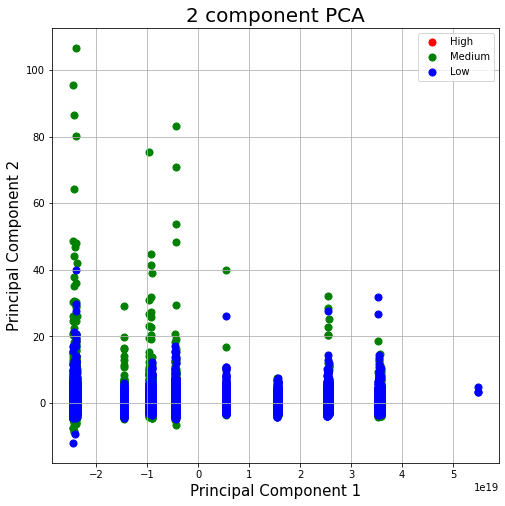

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['High', 'Medium', 'Low']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['rba_grade_desc'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

With the previous graph it becomes visible that the dataset has not got useful variables to explain our target variable

---

In [32]:
#df.to_excel("RBA_KYC_Accounts_ALL_Ids_CLEANED.xlsx")

### Let's develop a Gradient Boosting with against rbaValue

In [33]:
import pandas as pd
df = pd.read_excel("RBA_KYC_Accounts_ALL_Ids_CLEANED.xlsx")

In [34]:
list_inputs = ['branchCode', 
        'customerType', 
        'onboarding_labelencoded', #LABEL ENCODED
        'residentStatus',
        'residentCountry_labelencoded', 
        'nationalityOriginal_labelencoded', 
        'extraNationality_labelencoded',
        'age_in_year', 
        'profession', 
        'companyType', 
        'ledgerCode',
        'accountCurrency_labelencoded', 
        'jointAccount', 
        'CUS_CLASS', 
        'ECO_SEC',
        'TYPE_OF_DEP', 
        'GENDER', 
        'LEGAL_STA_CODE', 
        'avg_last_10_days',
        'avg_last_30_days', 
        'avg_last_90_days', 
        'number_of_cash_dep_90_days',
        'avg_cash_deposit_90_days', 
        'number_of_deposit_90_days',
        'avg_of_dep_90_days', 
        'number_of_cash_wd_90_days',
        'avg_of_cash_wd_90_days', 
        'number_of_wd_90_days', 
        'avg_of_wd_90_days',
        'MOB', 
        'residentCountry_missing',
        'nationalityOriginal_missing', 
        'extraNationality_missing',
        'dateOfBirth_missing', 
        'age_in_year_missing', 
        'profession_missing',
        'companyType_missing', 
        'GENDER_missing', 
        'LEGAL_STA_CODE_missing']

X = df[list_inputs]

# MODEL 1 - REGRESSION MODEL USING rbaValue

In [35]:
output_var = 'rbaValue'
y=df[output_var]
     

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Fit regression model
params = {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 2,'random_state':42}
clf = RandomForestRegressor(**params)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=50, random_state=42)

In [39]:
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

In [40]:
# Let's make a spearman correlation between predicted and observed values
from scipy.stats import spearmanr 
corr, p_value = spearmanr(y_train, y_train_preds)
print("spearman rank correlation - train=",corr, p_value)
corr, p_value = spearmanr(y_test, y_test_preds)
print("spearman rank correlation - test=",corr, p_value)

spearman rank correlation - train= 0.5979583264175341 0.0
spearman rank correlation - test= 0.5976245156485965 0.0


---

# MODEL 2 - CLASSIFICATION MODEL USING Risk_Description

In [41]:
output_var = 'Risk_Description'

In [42]:
df[output_var].value_counts()

Low       159680
Medium     65099
High          89
Name: Risk_Description, dtype: int64

In [43]:
df['TARGET']=1*df[output_var].isin(['High','Medium'])
df['TARGET'].value_counts()

0    159680
1     65188
Name: TARGET, dtype: int64

In [44]:
y=df['TARGET']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
params = {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 2,'random_state':42}
clf = RandomForestClassifier(**params)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

In [48]:
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

In [49]:
# Let's make a spearman correlation between predicted and observed values
from sklearn.metrics import accuracy_score 
a_score = accuracy_score(y_train, y_train_preds)
print("accuracy_score - train=",a_score)
a_score = accuracy_score(y_test, y_test_preds)
print("accuracy_score - test=",a_score)

accuracy_score - train= 0.7671527468953478
accuracy_score - test= 0.766140660584581
